In [ ]:
Dataset Arboles de Decisión – Red Wine Quality:


Jose Miguel Cruz Segura 


#202016908_84

In [3]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
Datos3 = pd.read_csv('C:/Users/ASUS-PC/OneDrive/Documentos/fase3/ANÁLISIS_DE_DATOS/Anexo4_Dataset_RedWineQuality/winequality-red.csv')

In [22]:
Datos3.head(40)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [23]:
Datos3.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [25]:
Datos3.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

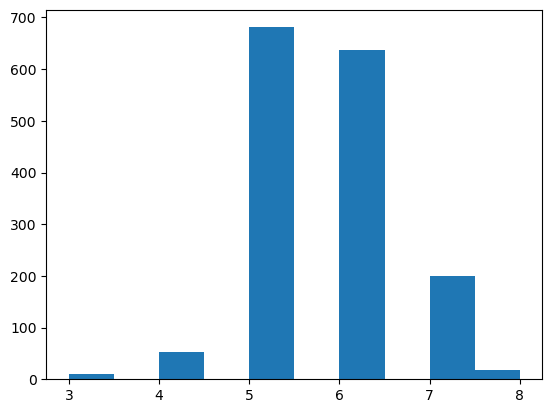

In [11]:
plt.hist(Datos3.quality)

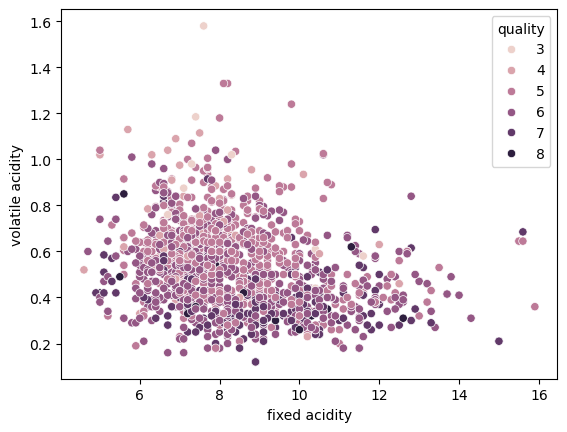

In [12]:
import seaborn as sns

sns.scatterplot(x="fixed acidity", y="volatile acidity", hue="quality", data=Datos3)
plt.show()


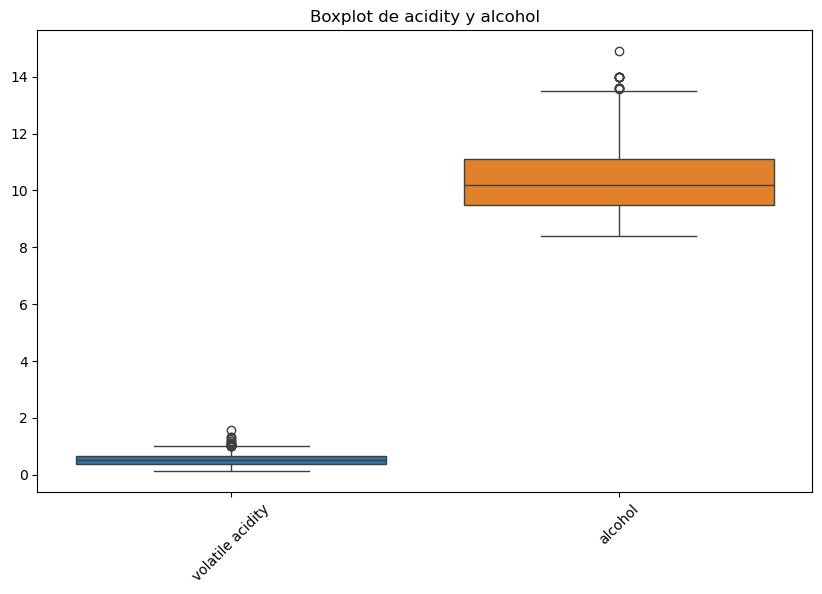

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=Datos3[['volatile acidity', 'alcohol']])
plt.xticks(rotation=45)
plt.title('Boxplot de acidity y alcohol')
plt.show()


In [31]:
predictors_col = ['volatile acidity', 'alcohol']
target_col = ['quality']

In [34]:
predictors = Datos3[predictors_col]
target = Datos3[target_col]

In [35]:
predictors

,volatile acidity,alcohol
0,0.700,9.4
1,0.880,9.8
2,0.760,9.8
3,0.280,9.8
4,0.700,9.4
...,...,...
1594,0.600,10.5
1595,0.550,11.2
1596,0.510,11.0
1597,0.645,10.2


In [36]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [37]:
corr = predictors.corr()
corr

,volatile acidity,alcohol
volatile acidity,1.000000,-0.202288
alcohol,-0.202288,1.000000


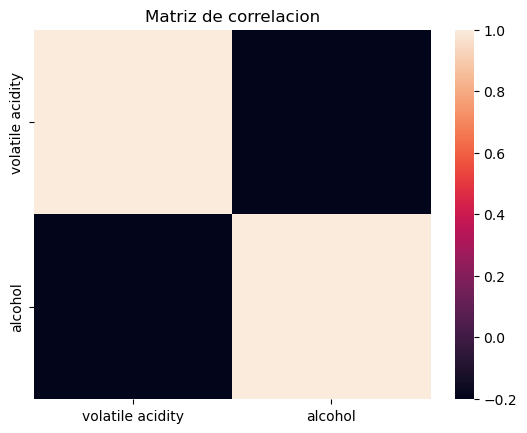

In [38]:
sns.heatmap(corr)
plt.title('Matriz de correlacion')
plt.show()

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.2,random_state=13)

In [41]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()


In [42]:
arbol = tree.fit(X_train, Y_train)

[Text(0.538175908936138, 0.9772727272727273, 'x[1] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.2659650234564165, 0.9318181818181818, 'x[0] <= 0.548\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.10614406779661018, 0.8863636363636364, 'x[0] <= 0.317\ngini = 0.573\nsamples = 364\nvalue = [1, 8, 172, 163, 20, 0]'),
 Text(0.03171912832929782, 0.8409090909090909, 'x[1] <= 10.45\ngini = 0.505\nsamples = 54\nvalue = [0, 1, 9, 36, 8, 0]'),
 Text(0.020823244552058112, 0.7954545454545454, 'x[1] <= 9.75\ngini = 0.47\nsamples = 50\nvalue = [0, 1, 8, 35, 6, 0]'),
 Text(0.008716707021791767, 0.75, 'x[1] <= 9.45\ngini = 0.554\nsamples = 25\nvalue = [0.0, 1.0, 7.0, 15.0, 2.0, 0.0]'),
 Text(0.00387409200968523, 0.7045454545454546, 'x[0] <= 0.215\ngini = 0.403\nsamples = 12\nvalue = [0, 1, 0, 9, 2, 0]'),
 Text(0.001937046004842615, 0.6590909090909091, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 2, 0]'),
 Text(0.00581113

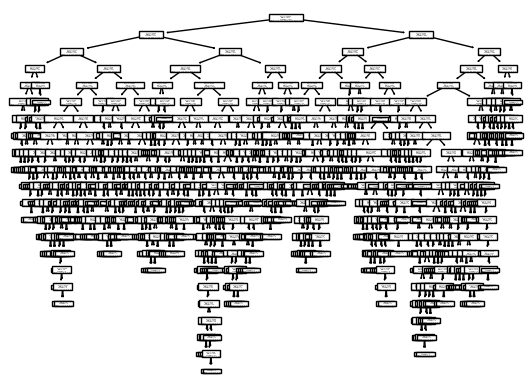

In [44]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Suponiendo que ya has entrenado el árbol
plot_tree(arbol)


In [46]:
predicciones = arbol.predict(X_test)

In [47]:
predicciones

array([7, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5,
       6, 5, 5, 6, 5, 5, 4, 6, 7, 6, 5, 6, 5, 6, 6, 5, 6, 7, 5, 6, 6, 6,
       5, 6, 6, 7, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 4, 5, 7, 7,
       6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 4, 5, 6, 6, 6, 6,
       5, 5, 5, 6, 7, 6, 5, 5, 5, 4, 5, 5, 6, 7, 5, 5, 7, 6, 6, 5, 5, 6,
       6, 6, 6, 5, 6, 5, 5, 7, 5, 5, 5, 4, 5, 6, 5, 6, 5, 5, 6, 6, 5, 5,
       6, 7, 7, 6, 7, 5, 6, 7, 6, 5, 5, 6, 7, 6, 6, 6, 5, 6, 5, 7, 5, 5,
       5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5,
       5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 7, 6,
       5, 5, 6, 6, 7, 6, 6, 5, 6, 5, 7, 7, 6, 5, 5, 6, 7, 5, 5, 7, 7, 7,
       5, 5, 6, 5, 5, 5, 5, 5, 3, 6, 6, 6, 6, 5, 3, 6, 6, 6, 6, 5, 5, 6,
       5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 7, 6, 5, 5, 7, 7, 5,
       5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 3, 5, 5, 5, 5, 5, 6, 4, 5, 7, 5,
       7, 7, 5, 6, 6, 6, 5, 6, 5, 7, 6, 6, 5, 6, 5,

In [48]:
pd.crosstab(np.array([y[0] for y in Y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['predicciones'])

predicciones,3,4,5,6,7
Actual,,,,,
3,0,0,0,1,0
4,1,1,3,2,1
5,2,3,105,32,4
6,0,2,45,63,14
7,0,0,4,18,13
8,0,0,0,5,1


In [50]:
from sklearn.metrics import accuracy_score

# Ahora puedes calcular la precisión
accuracy = accuracy_score(Y_test, predicciones)
accuracy


0.56875

In [ ]:
from sklearn.metrics import precision_score, accuracy_score

# Calcula la precisión y precisión general
precision = precision_score(Y_test, predicciones, average='weighted')
accuracy = accuracy_score(Y_test, predicciones)

# Muestra los resultados
print("Precisión:", precision)
print("Exactitud:", accuracy)


In [59]:
from sklearn.metrics import recall_score

# Luego, calcula el recall (sensibilidad)
recall = recall_score(Y_test, predicciones, average='weighted')
recall


0.56875

In [62]:
from sklearn.metrics import f1_score

# Calcula el puntaje F1
f1 = f1_score(Y_test, predicciones, average='weighted')

# Muestra el resultado
print("F1 Score:", f1)


F1 Score: 0.560889867085448
